# **SpaceX  Falcon 9 first stage Landing Prediction**

#  Collecting the data

In this capstone, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

In [ ]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

From the rocket column we would like to learn the booster name.

In [ ]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [ ]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [ ]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [ ]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [ ]:
response = requests.get(spacex_url)

In [ ]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

Request and parse the SpaceX launch data using the GET request


In [ ]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [ ]:
response.status_code

200

In [ ]:
response = requests.get(static_json_url)

In [ ]:
data_json = response.json()

Now we decode the response content as a Json using .json() and turn it into a Pandas dataframe using .json_normalize()

In [ ]:
data= pd.json_normalize(data_json)

In [ ]:
data.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [ ]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

From the rocket we would like to learn the booster name

From the payload we would like to learn the mass of the payload and the orbit that it is going to

From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.

From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [ ]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
BoosterVersion

[]

In [ ]:
# Call getBoosterVersion
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
# Call getLaunchSite
getLaunchSite(data)

In [ ]:
# Call getPayloadData
getPayloadData(data)

In [ ]:
# Call getCoreData
getCoreData(data)

In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [ ]:
df = pd.DataFrame(launch_dict)

In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           94 non-null     object 
 5   LaunchSite      94 non-null     object 
 6   Outcome         94 non-null     object 
 7   Flights         94 non-null     int64  
 8   GridFins        94 non-null     bool   
 9   Reused          94 non-null     bool   
 10  Legs            94 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     94 non-null     int64  
 14  Serial          94 non-null     object 
 15  Longitude       94 non-null     float64
 16  Latitude        94 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [ ]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [ ]:
# Filter the DataFrame to exclude Falcon 1 launches and keep only Falcon 9 launches
data_falcon9 = df[df['BoosterVersion'] != 'Falcon 1']

# Display the filtered DataFrame
print(data_falcon9)


    FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4              6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5              8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6             10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7             11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8             12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   
..           ...         ...            ...          ...   ...           ...   
89           102  2020-09-03       Falcon 9      15600.0  VLEO    KSC LC 39A   
90           103  2020-10-06       Falcon 9      15600.0  VLEO    KSC LC 39A   
91           104  2020-10-18       Falcon 9      15600.0  VLEO    KSC LC 39A   
92           105  2020-10-24       Falcon 9      15600.0  VLEO  CCSFS SLC 40   
93           106  2020-11-05       Falcon 9       3681.0   MEO  CCSFS SLC 40   

        Outcome  Flights  GridFins  Reu

In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [ ]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [ ]:
# Replace missing values in the 'PayloadMass' column with the mean of that column
df['PayloadMass'] = df['PayloadMass'].fillna(df['PayloadMass'].mean())

# Display the DataFrame after replacing missing values
print(df)


    FlightNumber        Date BoosterVersion   PayloadMass Orbit  \
0              1  2006-03-24       Falcon 1     20.000000   LEO   
1              2  2007-03-21       Falcon 1   5919.165341   LEO   
2              4  2008-09-28       Falcon 1    165.000000   LEO   
3              5  2009-07-13       Falcon 1    200.000000   LEO   
4              6  2010-06-04       Falcon 9   5919.165341   LEO   
..           ...         ...            ...           ...   ...   
89           102  2020-09-03       Falcon 9  15600.000000  VLEO   
90           103  2020-10-06       Falcon 9  15600.000000  VLEO   
91           104  2020-10-18       Falcon 9  15600.000000  VLEO   
92           105  2020-10-24       Falcon 9  15600.000000  VLEO   
93           106  2020-11-05       Falcon 9   3681.000000   MEO   

         LaunchSite    Outcome  Flights  GridFins  Reused   Legs  \
0   Kwajalein Atoll  None None        1     False   False  False   
1   Kwajalein Atoll  None None        1     False   False  

In [ ]:
df["PayloadMass"].head()

0      20.000000
1    5919.165341
2     165.000000
3     200.000000
4    5919.165341
Name: PayloadMass, dtype: float64

In [ ]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

In [ ]:
df1 = pd.read_csv("/content/dataset_part_1.csv")

Identify and calculate the percentage of the missing values in each attribute

In [ ]:
df1.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        5.319149
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        27.659574
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [ ]:
# Replace missing values in the 'PayloadMass' column with the mean of that column
df1['PayloadMass'] = df1['PayloadMass'].fillna(df1['PayloadMass'].mean())

df1['PayloadMass'].head()

0    6123.547647
1     525.000000
2     677.000000
3     500.000000
4    3170.000000
Name: PayloadMass, dtype: float64

Counting number of launches in each site

In [ ]:
df1["LaunchSite"].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Frequency in each orbit

In [ ]:
df1["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [ ]:
landing_outcomes = df1["Outcome"].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

Create a landing outcome label from Outcome column

In [ ]:
bad_outcomes = {'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}  # Define the set of bad outcomes
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in Outcome]


In [ ]:
# Assuming 'Outcome' is the column in your DataFrame that contains the outcomes
filtered_df = df1.dropna(subset=['Outcome'])

# Now, create the landing_class list using the filtered DataFrame
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in filtered_df['Outcome']]


In [ ]:
print("Length of df1:", len(df1))
print("Length of landing_class:", len(landing_class))


Length of df1: 90
Length of landing_class: 90


In [ ]:
df1['Class'] = landing_class
df1["Class"].mean()

0.6666666666666666

In [ ]:
df1.to_csv("dataset_part_2.csv", index=False)

**Exploratory Data Analysis**

In [ ]:
df2 = pd.read_csv("/content/dataset_part_2.csv")

In [ ]:
df2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# Replace missing values in the 'PayloadMass' column with the mean of that column
df2['PayloadMass'] = df2['PayloadMass'].fillna(df2['PayloadMass'].mean())



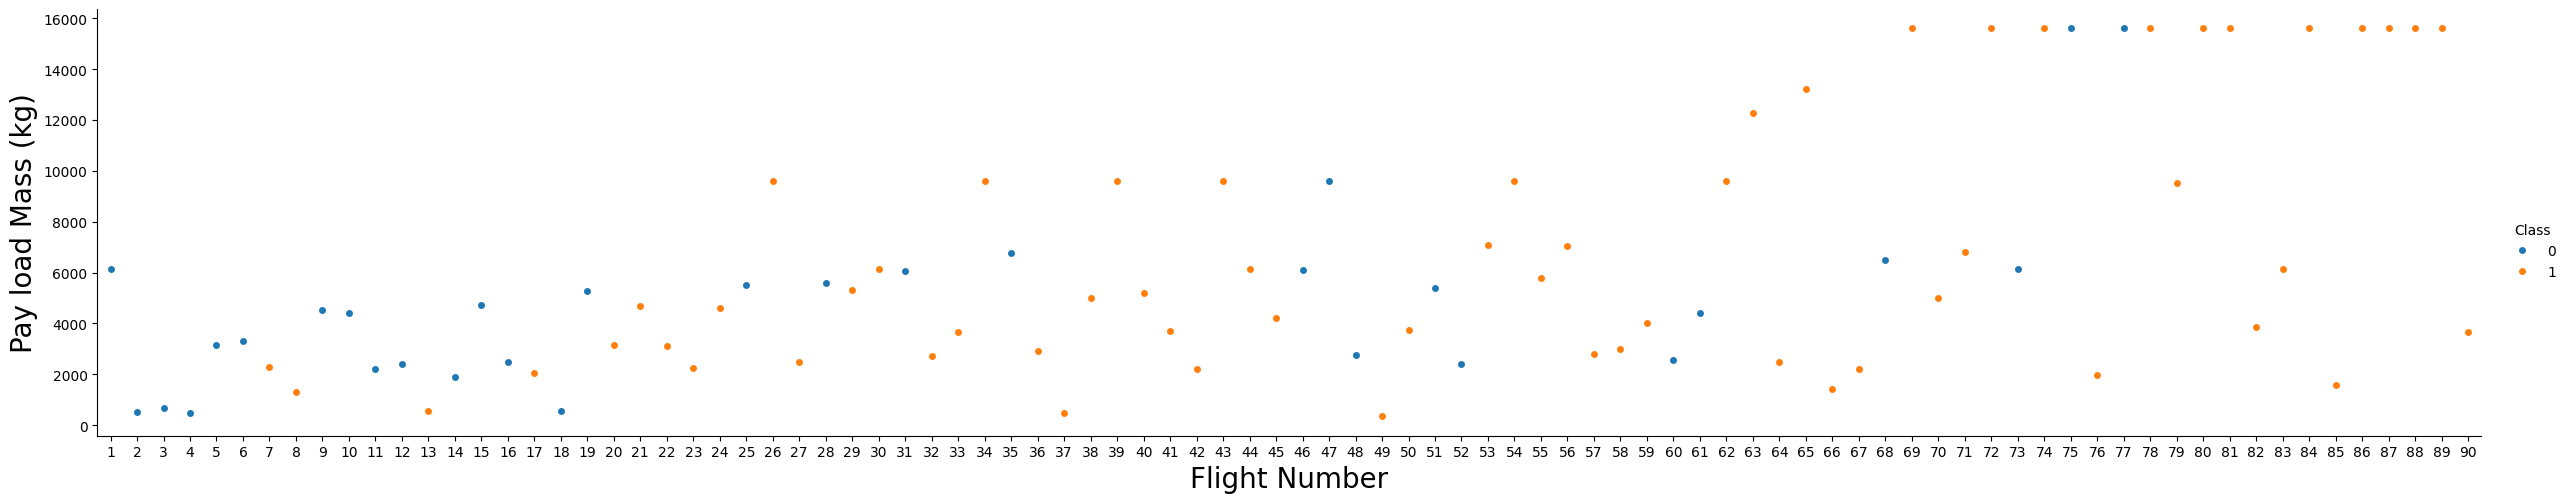

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df2, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

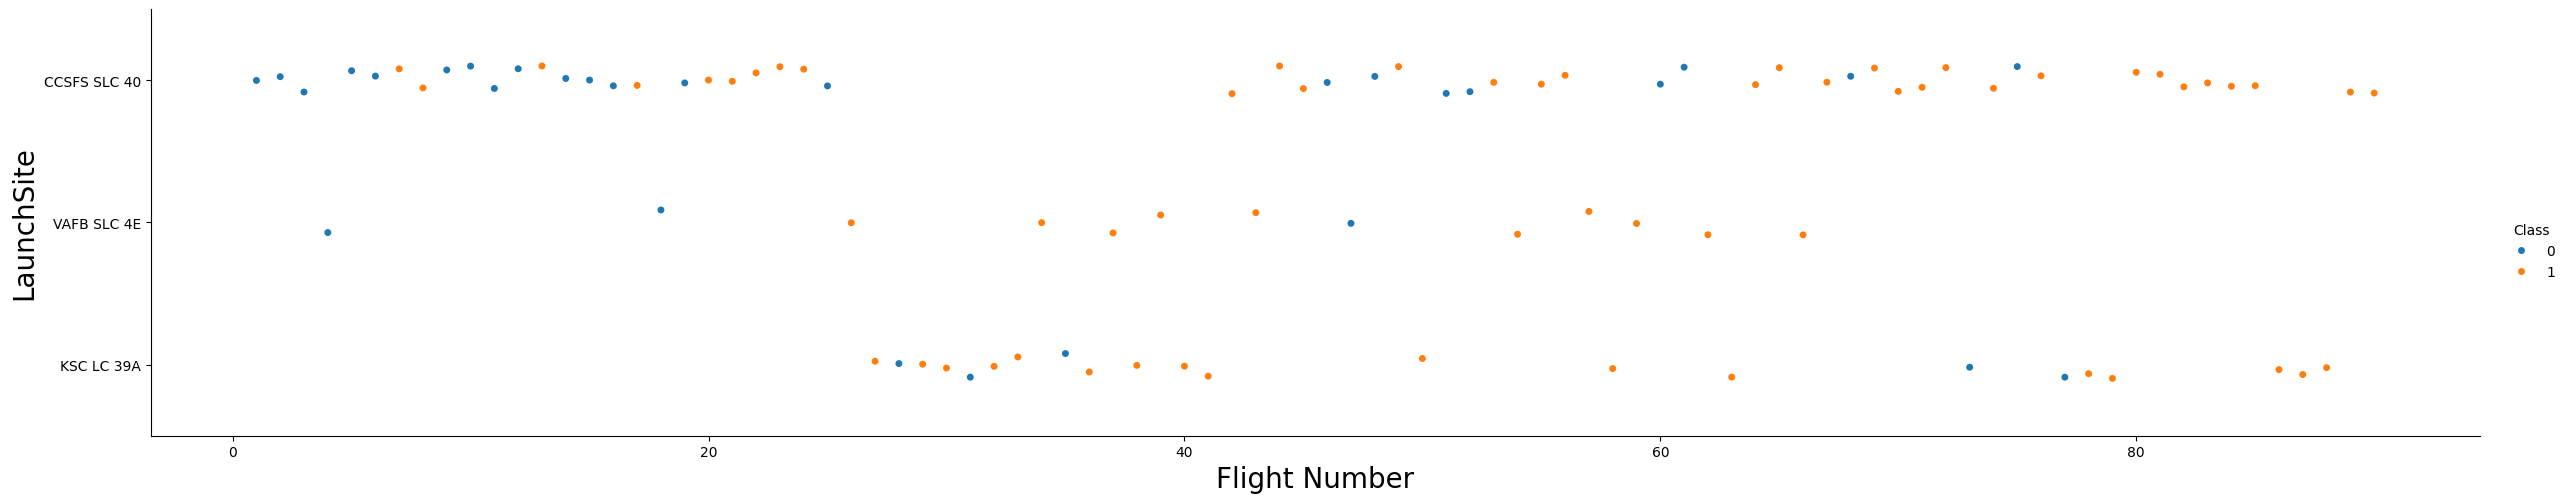

In [ ]:
sns.catplot(x="FlightNumber",y="LaunchSite", hue= "Class", data =df2,aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

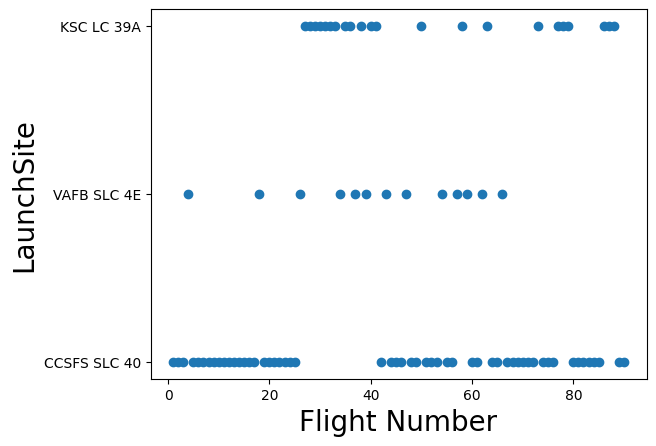

In [ ]:
plt.scatter(df2["FlightNumber"], df2["LaunchSite"])
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("LaunchSite", fontsize=20)
plt.show()


In this Launchsite vs  Flight number the observations are CCSFS SLC 40 has  more FlightNumbers and VAFB has least

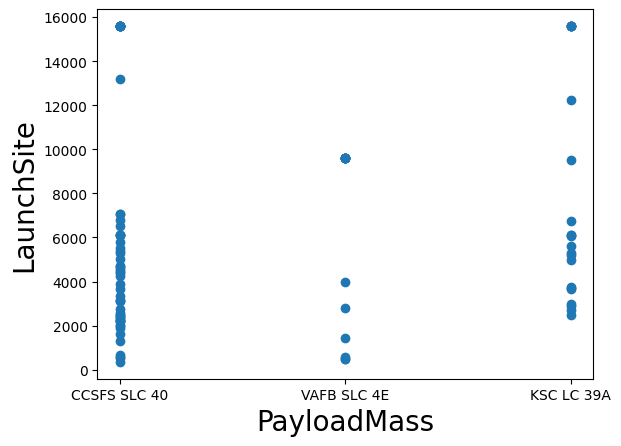

In [ ]:
plt.scatter(df2["LaunchSite"], df2["PayloadMass"])
plt.xlabel("PayloadMass", fontsize=20)
plt.ylabel("LaunchSite", fontsize=20)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

The relationship between success rate of each orbit type

In [ ]:
success_rates = df2.groupby('Orbit')['Class'].mean()

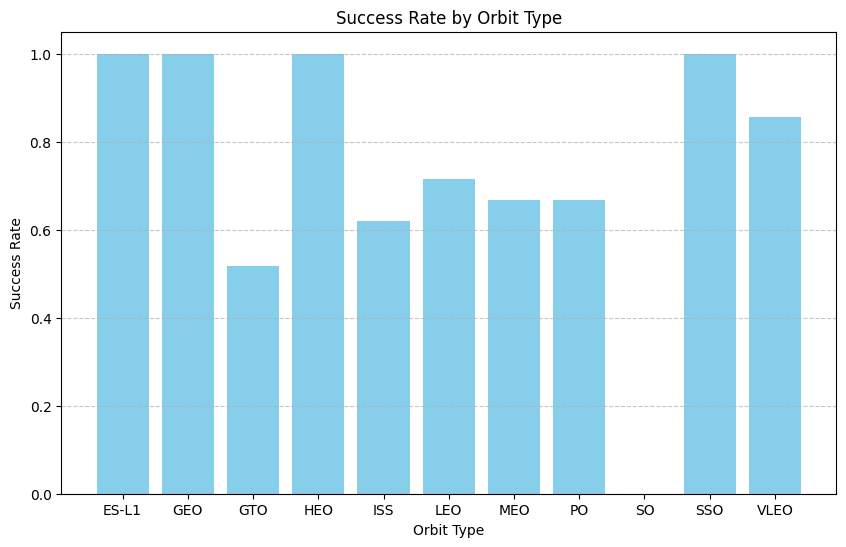

In [ ]:
# Extract the orbit types and success rates for plotting
orbit_types = success_rates.index
success_rates = success_rates.values

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(orbit_types, success_rates, color='skyblue')

# Adding titles and labels
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.show()

By this chart we can say that ES-L1,GEO,HEO and SSO has high success rate and SO has least

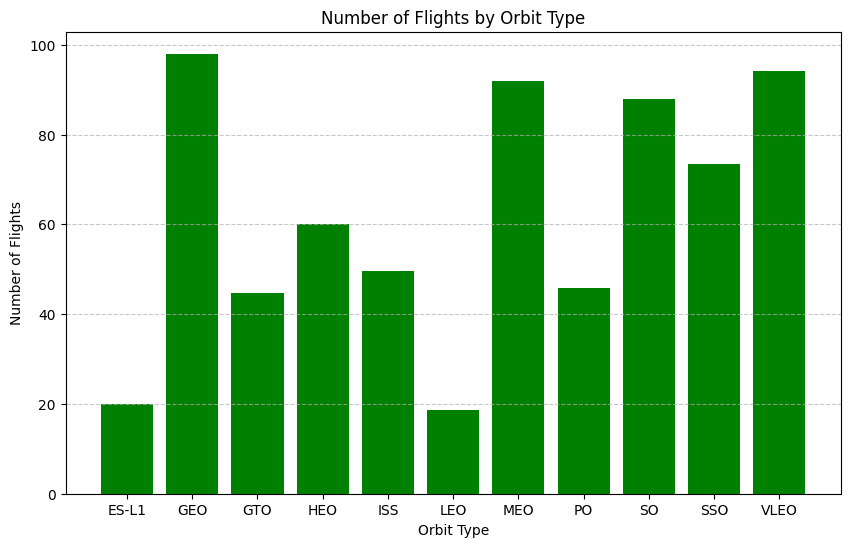

In [ ]:
# Group by 'Orbit' and count the number of flights
flight_counts = df.groupby('Orbit')['FlightNumber'].mean()

# Extract the orbit types and flight counts for plotting
orbit_types = flight_counts.index
flight_values = flight_counts.values

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(orbit_types, flight_values, color='green')

# Adding titles and labels
plt.title('Number of Flights by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Flights')

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.show()


In this bar chart GEO orbit type has more number of flights followed by VLEO, while LEO has the least

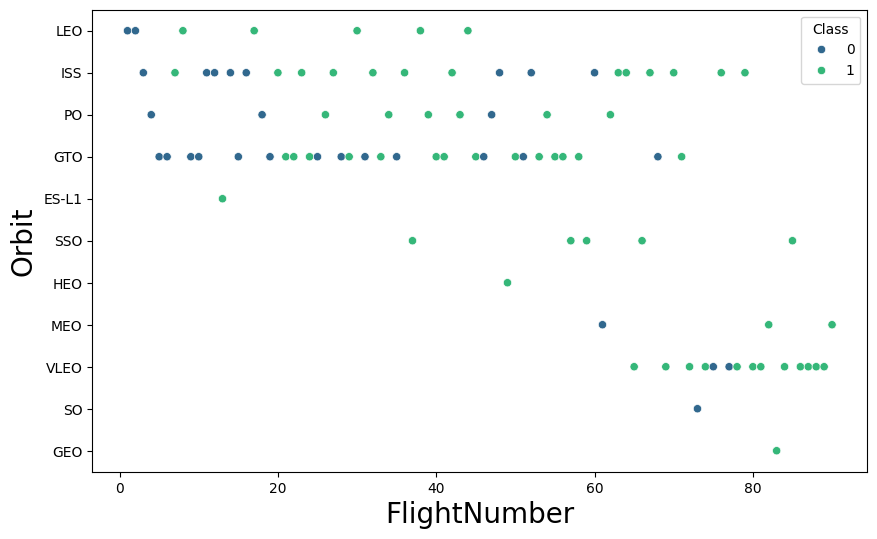

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df2, x='FlightNumber', y='Orbit', hue='Class', palette='viridis')
plt.xlabel("FlightNumber",fontsize = 20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


In this Orbit vs FlightNumber You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

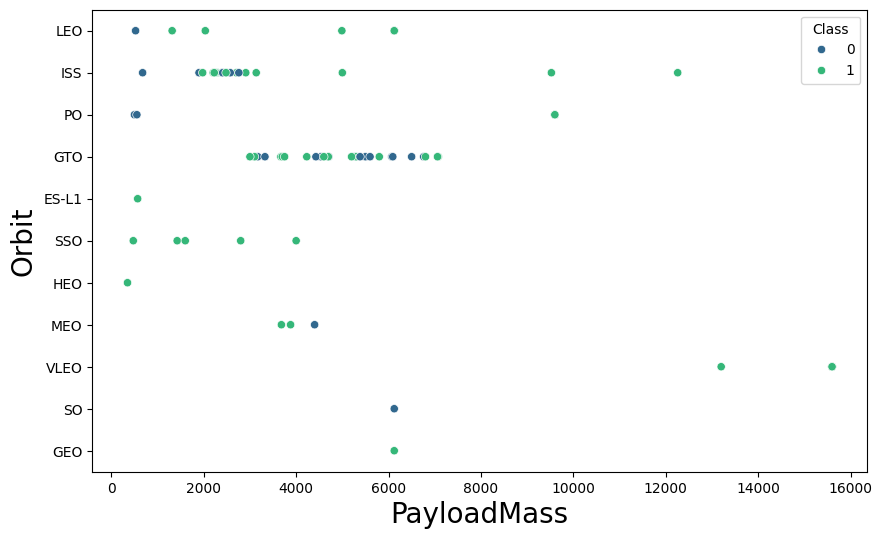

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df2, x='PayloadMass', y='Orbit', hue='Class', palette='viridis')
plt.xlabel("PayloadMass",fontsize = 20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for SSO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.



In [ ]:
def extract_year():
    return [i.split("-")[0] for i in df2["Date"]]

# Extract year and add it as a new column
df2['Year'] = extract_year()

# Display the first few rows to check the data
print(df2.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857

In [ ]:
# Group by 'Year' and calculate the mean of 'Class' to get average success rates
average_success_rate = df2.groupby('Year')['Class'].mean()

# Extract years and their corresponding average success rates for plotting
years = average_success_rate.index
success_rates = average_success_rate.values


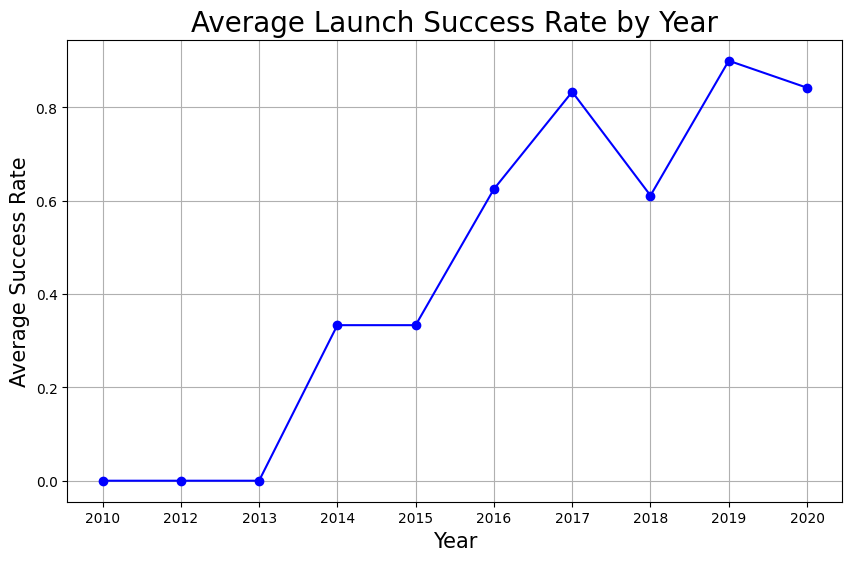

In [ ]:
# Creating the line chart
plt.figure(figsize=(10, 6))
plt.plot(years, success_rates, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Average Launch Success Rate by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)

# Adding a grid for better readability
plt.grid(True)

# Displaying the chart
plt.show()


 Create dummy variables to categorical columns

The trend has been increased since 2013-2014,2015-2016,2018-2019.

In [ ]:
features = df2[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

In [ ]:
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6123.547647        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0            0        False      False      False      False      False   
1            0        False      False      False      False      False   
2            0        False      False      False      False       True   
3            0        False      False      False      False      False   
4            0        False      False       True      False      False   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0       True      False     False     Fa

In [ ]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     bool   
 9   Orbit_GEO                            90 non-null     bool   
 10  Orbit_GTO                            90 non-null     bool   
 11  Orbit_HEO                         

Cast all numeric columns to `float64`

In [ ]:
numeric_columns = features_one_hot.select_dtypes(include=['int', 'float']).columns
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Display the first few rows of the resulting dataframe
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0           1.0  6123.547647      1.0     False   False  False    1.0   
1           2.0   525.000000      1.0     False   False  False    1.0   
2           3.0   677.000000      1.0     False   False  False    1.0   
3           4.0   500.000000      1.0     False   False  False    1.0   
4           5.0  3170.000000      1.0     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0          0.0        False      False      False      False      False   
1          0.0        False      False      False      False      False   
2          0.0        False      False      False      False       True   
3          0.0        False      False      False      False      False   
4          0.0        False      False       True      False      False   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0       True      False     False     Fa

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

Launch Sites Locations Analysis with Folium

In [ ]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [ ]:
import pandas as pd
import io
import requests

# URL of the CSV file
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'

# Download the CSV file
response = requests.get(URL)
spacex_csv_file = io.BytesIO(response.content)

# Read the CSV file into a DataFrame
spacex_df = pd.read_csv(spacex_csv_file)

# Display the first few rows of the dataframe
print(spacex_df.head())


   Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                                          Payload  \
0                            Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats,  barrel of Brouère cheese   
2                                          Dragon demo flight C2+   
3                                                    SpaceX CRS-1   
4                                                    SpaceX CRS-2   

   Payload Mass (kg)      Orbit         Customer        Landing Outcome  \
0                0.0        LEO           SpaceX  Failure   (parachute)   
1 

In [ ]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [ ]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [ ]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
import pandas as pd
import folium
from folium.features import DivIcon

# Define the coordinates for NASA Johnson Space Center
nasa_coordinate = [29.559684, -95.083097]

# Example DataFrame creation (replace with your actual DataFrame)
data = {
    'LaunchSite': ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'CCAFS LC 40'],
    'Lat': [28.5623, 34.6328, 28.5733, 28.5623],
    'Long': [-80.5774, -120.6108, -80.6514, -80.5774]
}

launch_sites = pd.DataFrame(data)

# Initialize the map centered around NASA Johnson Space Center
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Iterate over the launch_sites DataFrame and add a Circle and Marker for each site
for index, site in launch_sites.iterrows():
    coordinate = [site['Lat'], site['Long']]
    name = site['LaunchSite']

    # Create a Circle
    circle = folium.Circle(
        coordinate,
        radius=1000,
        color='#0000ff',  # Blue color for the circle
        fill=True,
        fill_color='#0000ff'
    ).add_child(folium.Popup(name))

    # Create a Marker
    marker = folium.map.Marker(
        coordinate,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % name,
        )
    )

    # Add the Circle and Marker to the map
    site_map.add_child(circle)
    site_map.add_child(marker)

# Display the map
site_map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates. Recall that data frame spacex_df has detailed launch records, and the class column indicates if this launch was successful or not

In [ ]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [ ]:
marker_cluster = MarkerCluster()


In [ ]:
# Create a new column 'marker_color' based on the 'Class' column
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

# Initialize the map centered around NASA Johnson Space Center
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(site_map)

# Iterate over the spacex_df DataFrame and add a marker for each launch
for index, record in spacex_df.iterrows():
    coordinate = [record['Lat'], record['Long']]

    # Create a Marker
    marker = folium.Marker(
        location=coordinate,
        icon=folium.Icon(color=record['marker_color']),
        popup=f"{record['Launch Site']}<br>Outcome: {'Success' if record['class'] == 1 else 'Failure'}"
    )

    # Add the marker to the MarkerCluster
    marker_cluster.add_child(marker)

# Display the map
site_map

In [ ]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [ ]:
coastlines = [
    (28.56367, -80.57163),
    (34.63500, -120.61000)
]

# Find the closest coastline and calculate the distance for each launch site
def find_closest_coastline(lat, lon, coastlines):
    min_distance = float('inf')
    closest_coastline = None
    for coastline in coastlines:
        coastline_lat, coastline_lon = coastline
        distance = haversine(lat, lon, coastline_lat, coastline_lon)
        if distance < min_distance:
            min_distance = distance
            closest_coastline = coastline
    return closest_coastline, min_distance

# Add new columns to spacex_df for closest coastline and distance
spacex_df['ClosestCoastline'] = spacex_df.apply(lambda row: find_closest_coastline(row['Lat'], row['Long'], coastlines)[0], axis=1)
spacex_df['DistanceToCoastline'] = spacex_df.apply(lambda row: find_closest_coastline(row['Lat'], row['Long'], coastlines)[1], axis=1)

# Initialize the map centered around NASA Johnson Space Center
nasa_coordinate = [29.559684, -95.083097]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(site_map)

# Iterate over the spacex_df DataFrame and add a marker for each launch
for index, record in spacex_df.iterrows():
    coordinate = [record['Lat'], record['Long']]

    # Create a Marker
    marker = folium.Marker(
        location=coordinate,
        icon=folium.Icon(color='green' if record['class'] == 1 else 'red'),
        popup=f"{record['Launch Site']}<br>Outcome: {'Success' if record['class'] == 1 else 'Failure'}"
    )

    # Add the marker to the MarkerCluster
    marker_cluster.add_child(marker)

# Add a folium.Marker on the closest coastline point with distance displayed
for index, record in spacex_df.iterrows():
    coastline_lat, coastline_lon = record['ClosestCoastline']
    distance = record['DistanceToCoastline']

    distance_marker = folium.Marker(
        location=[coastline_lat, coastline_lon],
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html='<div style="font-size: 12; color:#d35400;"><b>{:.2f} KM</b></div>'.format(distance),
        )
    )

    site_map.add_child(distance_marker)

# Display the map
site_map

In [ ]:
launch_site_coordinates = [record['Lat'], record['Long']]
coastline_coordinates = [coastline_lat, coastline_lon]
lines = folium.PolyLine(locations=[launch_site_coordinates, coastline_coordinates], weight=1)
site_map.add_child(lines)

# Display the map
site_map


In [ ]:
points_of_interest = [
    {'name': 'City', 'coordinates': (30.000, -80.000)},
    {'name': 'Railway', 'coordinates': (32.000, -82.000)},
    {'name': 'Highway', 'coordinates': (29.500, -81.500)}
]
# Find the closest point of interest and calculate the distance for each launch site

def find_closest_point_of_interest(lat, lon, points_of_interest):
    min_distance = float('inf')
    closest_point = None
    for point in points_of_interest:
        point_name = point['name']
        point_lat, point_lon = point['coordinates']
        distance = haversine(lat, lon, point_lat, point_lon)
        if distance < min_distance:
            min_distance = distance
            closest_point = {'name': point_name, 'coordinates': (point_lat, point_lon)}
    return closest_point, min_distance

# Add new columns to spacex_df for closest point of interest and distance
spacex_df['ClosestPointOfInterest'] = spacex_df.apply(lambda row: find_closest_point_of_interest(row['Lat'], row['Long'], points_of_interest)[0], axis=1)
spacex_df['DistanceToPointOfInterest'] = spacex_df.apply(lambda row: find_closest_point_of_interest(row['Lat'], row['Long'], points_of_interest)[1], axis=1)

# Initialize the map centered around NASA Johnson Space Center
nasa_coordinate = [29.559684, -95.083097]
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# Iterate over the spacex_df DataFrame and add a marker for each launch
for index, record in spacex_df.iterrows():
    coordinate = [record['Lat'], record['Long']]

    # Create a Marker
    marker = folium.Marker(
        location=coordinate,
        icon=folium.Icon(color='green' if record['class'] == 1 else 'red'),
        popup=f"{record['Launch Site']}<br>Outcome: {'Success' if record['class'] == 1 else 'Failure'}"
    )

    # Add the marker to the map
    site_map.add_child(marker)

# Add a folium.Marker on the closest point of interest with distance displayed
for index, record in spacex_df.iterrows():
    poi_name, poi_coordinates = record['ClosestPointOfInterest']['name'], record['ClosestPointOfInterest']['coordinates']
    distance = record['DistanceToPointOfInterest']

    distance_marker = folium.Marker(
        location=poi_coordinates,
        icon=DivIcon(
            icon_size=(20, 20),
            icon_anchor=(0, 0),
            html='<div style="font-size: 12; color:#d35400;"><b>{:.2f} KM to {}</b></div>'.format(distance, poi_name),
        )
    )

    site_map.add_child(distance_marker)

    # Create and add a PolyLine between launch site and closest point of interest
    launch_site_coordinates = [record['Lat'], record['Long']]
    lines = folium.PolyLine(locations=[launch_site_coordinates, poi_coordinates], weight=1)
    site_map.add_child(lines)

# Display the map
site_map

Creating Dashboards

In [ ]:
!pip install dash plotly


In [ ]:
# Import required libraries
import dash
import dash_core_components as dcc
import dash_html_components as html

# Initialize the Dash app
app = dash.Dash(__name__)

# Extract unique launch sites from spacex_df
launch_sites = spacex_df['Launch Site'].unique()

# Define options for the dropdown
options = [{'label': site, 'value': site} for site in launch_sites]
options.insert(0, {'label': 'All Sites', 'value': 'ALL'})

# Define layout
app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=options,
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>

In [ ]:
# Import required libraries
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'}
        ],
        value='ALL',
        placeholder="Select a Launch Site here",
        searchable=True
    ),
    dcc.Graph(id='success-pie-chart')
])

# Define callback function
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value')]
)
def update_pie_chart(selected_site):
    if selected_site == 'ALL':
        # If 'All Sites' is selected, calculate success counts for all sites
        success_counts = spacex_df['class'].value_counts()
    else:
        # If a specific site is selected, filter the dataframe by the selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == selected_site]
        # Calculate success counts for the selected site
        success_counts = filtered_df['class'].value_counts()

    # Create a pie chart
    fig = px.pie(success_counts, values=success_counts.values, names=success_counts.index,
                 title='Success Counts for {}'.format(selected_site))

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>

In [ ]:
import dash_core_components as dcc

# Define the minimum and maximum payload values
min_payload = 0
max_payload = 10000

# Define the marks for the slider
marks = {i: str(i) for i in range(0, max_payload+1, 1000)}

# Define the initial selected range
initial_value = [min_payload, max_payload]

# Create the Range Slider component
payload_slider = dcc.RangeSlider(
    id='payload-slider',
    min=min_payload,
    max=max_payload,
    step=1000,
    marks=marks,
    value=initial_value
)


In [ ]:
import plotly.express as px
from dash.dependencies import Input, Output

# Define the callback function
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    [Input('site-dropdown', 'value'), Input('payload-slider', 'value')]
)
def update_scatter_chart(selected_site, payload_range):
    # Filter the df based on the selected launch site
    if selected_site == 'ALL':
        filtered_df = df2
    else:
        filtered_df = df2[df2['Launch Site'] == selected_site]

    # Filter the dataframe based on the payload range
    min_payload, max_payload = payload_range
    filtered_df = filtered_df[(filtered_df['PayloadMass'] >= min_payload) & (filtered_df['PayloadMass'] <= max_payload)]

    # Create the scatter plot
    fig = px.scatter(filtered_df, x='PayloadMass', y='class', color='Booster Version Category',
                     title='Success Payload Scatter Chart',
                     labels={'PayloadMass': 'Payload Mass (kg)', 'class': 'Launch Outcome'},
                     color_discrete_map={'Success': 'green', 'Failure': 'red'})

    return fig


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [ ]:
X = pd.read_csv("/content/dataset_part_3.csv")

In [ ]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,False,False,False,1.0,0.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2.0,525.000000,1.0,False,False,False,1.0,0.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3.0,677.000000,1.0,False,False,False,1.0,0.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4.0,500.000000,1.0,False,False,False,1.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5.0,3170.000000,1.0,False,False,False,1.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Replace missing values in the 'PayloadMass' column with the mean of that column
X['PayloadMass'] = X['PayloadMass'].fillna(X['PayloadMass'].mean())



 Machine Learning Prediction

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
Y = pd.Series(df2['Class'].to_numpy())

# Verify the type of Y
print(type(Y))

<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.preprocessing import StandardScaler
# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reassign X to the standardized data
X = X_scaled

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
Y_test.shape

(18,)

In [ ]:
lr = LogisticRegression()
# Define the parameter grid
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create GridSearchCV object
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters
print("Best Parameters:", logreg_cv.best_params_)

# Output the accuracy on the validation data
print("Validation Accuracy:", logreg_cv.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.8214285714285714


In [198]:
# Fit the best estimator obtained from GridSearchCV on the training data
best_estimator = logreg_cv.best_estimator_
best_estimator.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = best_estimator.predict(X_test)

# Calculate the accuracy
accuracy = best_estimator.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.8333333333333334


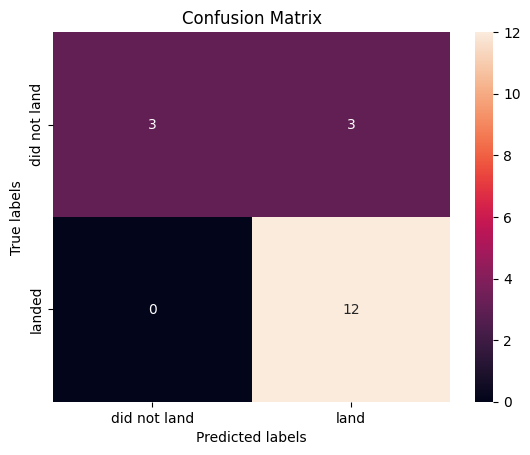

In [199]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [200]:
# Define the parameters grid
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a support vector machine (SVM) object
svm = SVC()

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Output the best parameters
print("Best parameters:", svm_cv.best_params_)

# Output the best score
print("Best score:", svm_cv.best_score_)

Best parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best score: 0.8482142857142858


In [201]:
# Calculate the accuracy on the test data using the method score
accuracy = svm_cv.score(X_test, Y_test)

# Output the accuracy
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.8333333333333334


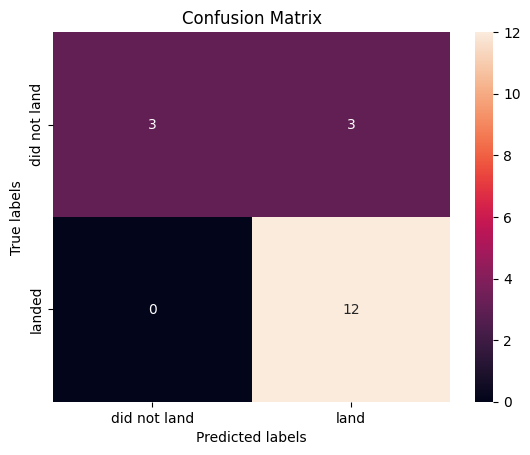

In [204]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [206]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree classifier object
tree = DecisionTreeClassifier()

# Define the parameters grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dis

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [207]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8642857142857142


In [208]:
# Calculate the accuracy on the test data using the method score
accuracy_tree = tree_cv.score(X_test, Y_test)
print("Accuracy of Decision Tree Classifier on test data:", accuracy_tree)


Accuracy of Decision Tree Classifier on test data: 0.5555555555555556


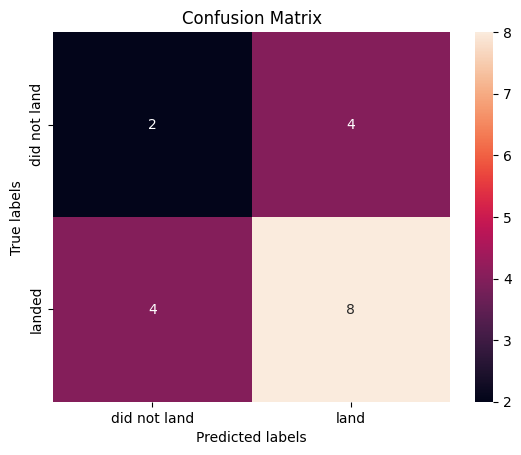

In [211]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [212]:
from sklearn.neighbors import KNeighborsClassifier


# Create KNN object
KNN = KNeighborsClassifier()

# Define parameters for grid search
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create GridSearchCV object
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train, Y_train)

# Output the best parameters
print("Best Parameters:", knn_cv.best_params_)

# Output the accuracy on the validation data using the best parameters
print("Accuracy on Validation Data:", knn_cv.best_score_)


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Accuracy on Validation Data: 0.8339285714285714


In [213]:
# Calculate the accuracy on the test data using the method score
accuracy_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on Test Data:", accuracy_knn)


Accuracy on Test Data: 0.7777777777777778


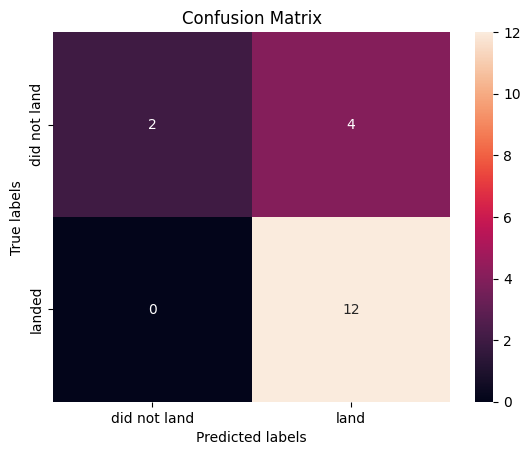

In [214]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [215]:
# Calculate the accuracy scores of each model on the test data
accuracy_logreg = logreg_cv.score(X_test, Y_test)
accuracy_svm = svm_cv.score(X_test, Y_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)

# Compare the accuracy scores
best_method = max(accuracy_logreg, accuracy_svm, accuracy_tree, accuracy_knn)

if best_method == accuracy_logreg:
    print("Logistic Regression performs the best with an accuracy of", accuracy_logreg)
elif best_method == accuracy_svm:
    print("Support Vector Machine performs the best with an accuracy of", accuracy_svm)
elif best_method == accuracy_tree:
    print("Decision Tree Classifier performs the best with an accuracy of", accuracy_tree)
elif best_method == accuracy_knn:
    print("K-Nearest Neighbors performs the best with an accuracy of", accuracy_knn)


Logistic Regression performs the best with an accuracy of 0.8333333333333334
